In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

研究球员价值的影响因数。
字段过多只取其中几个

数据：https://www.kaggle.com/karangadiya/fifa19

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [4]:
columns = ['Value','ID','Age','Nationality','Overall','Potential','Wage','Preferred Foot']
data = df[columns]

In [5]:
data = data.dropna()

In [6]:
data['Preferred Foot'].unique()

array(['Left', 'Right'], dtype=object)

In [7]:
def foot(x):
    if x=='Left':
        return 0
    else:
        return 1
data['Pre Foot'] = data['Preferred Foot'].apply(foot)

In [8]:
data['Pre Foot'].head()

0    0
1    1
2    1
3    1
4    1
Name: Pre Foot, dtype: int64

In [9]:
data.describe()

,ID,Age,Overall,Potential,Pre Foot
count,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214279.590286,25.122529,66.249904,71.319126,0.768104
std,29968.461880,4.670568,6.914613,6.134420,0.422055
min,16.000000,16.000000,46.000000,48.000000,0.000000
25%,200300.000000,21.000000,62.000000,67.000000,1.000000
50%,221743.000000,25.000000,66.000000,71.000000,1.000000
75%,236508.500000,28.000000,71.000000,75.000000,1.000000
max,246620.000000,45.000000,94.000000,95.000000,1.000000


In [10]:
def value(x):
    if 'M' in x:
        return float(x[1:-1])*1000
    elif 'K' in x:
        return float(x[1:-1])
    else:
        return 0
data['value'] = data['Value'].apply(value)

In [11]:
data['wage'] = data['Wage'].apply(value)

In [12]:
data.describe()

,ID,Age,Overall,Potential,Pre Foot,value,wage
count,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214279.590286,25.122529,66.249904,71.319126,0.768104,2416.131395,9.752574
std,29968.461880,4.670568,6.914613,6.134420,0.422055,5601.319279,22.024398
min,16.000000,16.000000,46.000000,48.000000,0.000000,0.000000,0.000000
25%,200300.000000,21.000000,62.000000,67.000000,1.000000,300.000000,1.000000
50%,221743.000000,25.000000,66.000000,71.000000,1.000000,675.000000,3.000000
75%,236508.500000,28.000000,71.000000,75.000000,1.000000,2000.000000,9.000000
max,246620.000000,45.000000,94.000000,95.000000,1.000000,118500.000000,565.000000


879


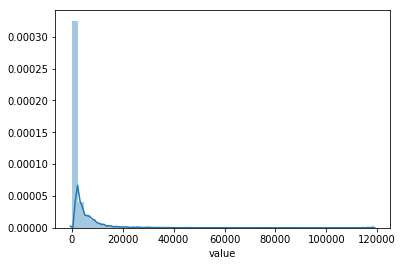

In [13]:
sns.distplot(data.value)
print(data[data.value>10000]['value'].count())

价值主要集中在600左右，高价值的球员占极少一部分，高于10000K的就只有879位球员,占据不到5%。

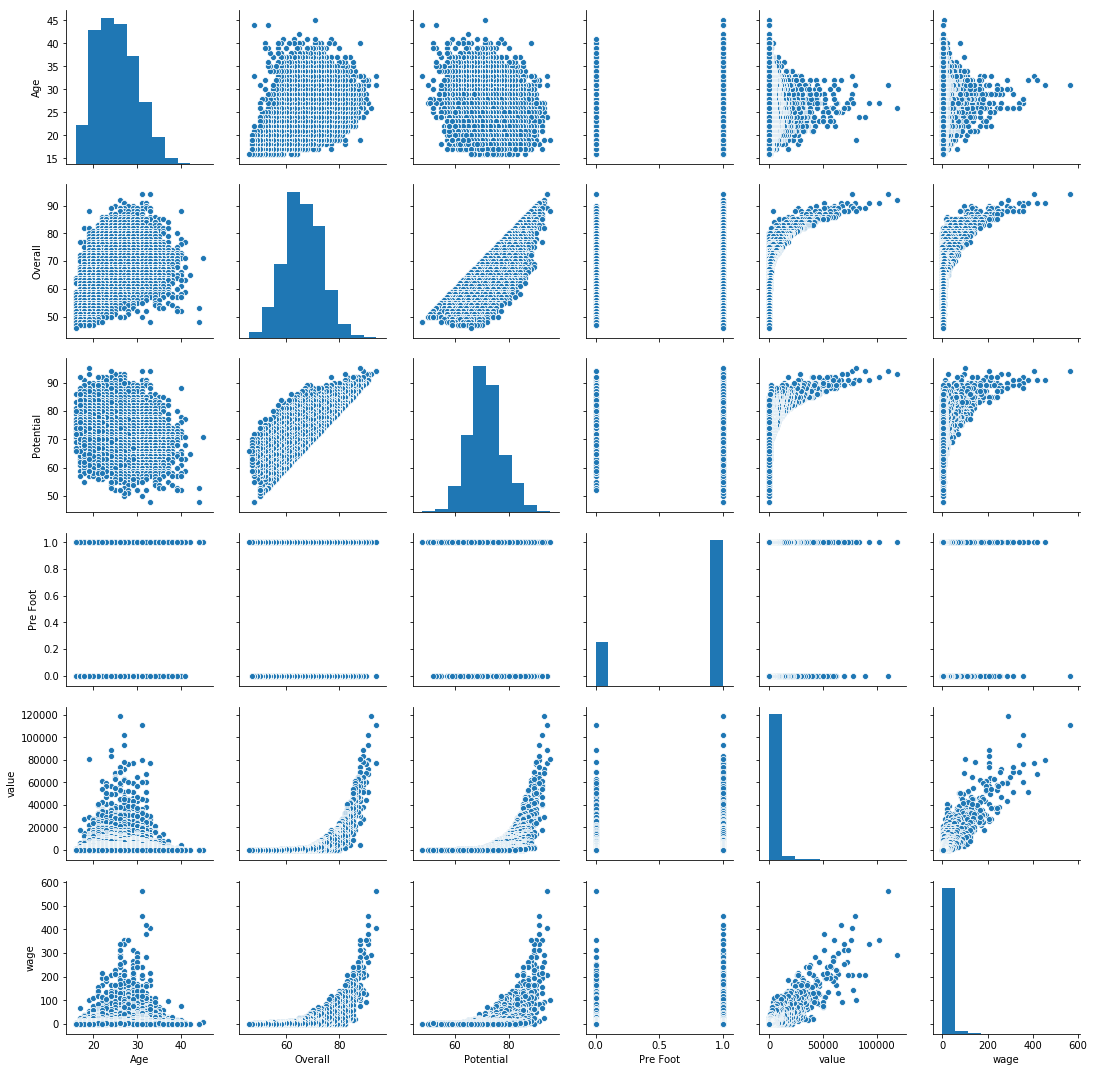

In [14]:
sns.pairplot(data.drop('ID',axis=1))

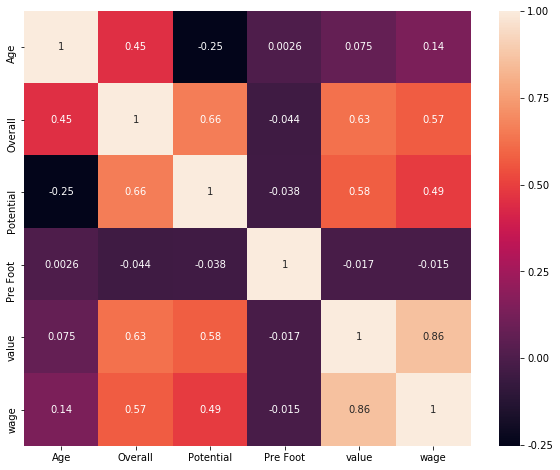

In [15]:
plt.figure(figsize=(10,8))
corr = data.drop('ID',1).corr()
sns.heatmap(corr,annot=True)

球员的价值与现工资强相关，与总体表现和潜能有一般相关，与年龄无线性相关性。

接下来逐个分析

## Preferred Foot

0.7681039704829561


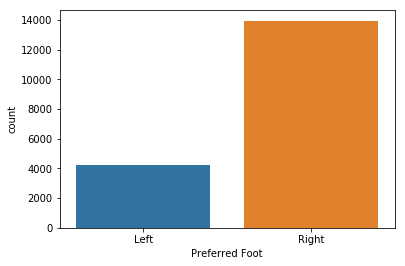

In [16]:
sns.countplot(data['Preferred Foot'])
print(data['Pre Foot'].sum()/data['Pre Foot'].count())

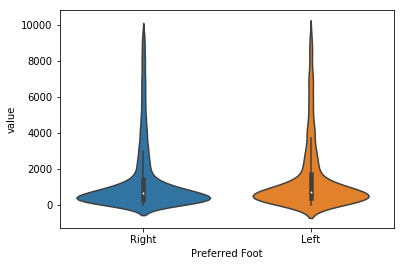

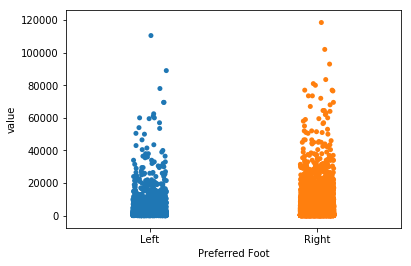

In [17]:
sns.violinplot(y = 'value',x='Preferred Foot',data=data[data.value<10000])
plt.figure()
sns.stripplot(x='Preferred Foot',y='value',data=data)

76.8%球员习惯用右脚。但用脚的习惯对球员的价值也是没有相关性

## Nationality

['England' 'Germany' 'Spain' 'Argentina' 'France']


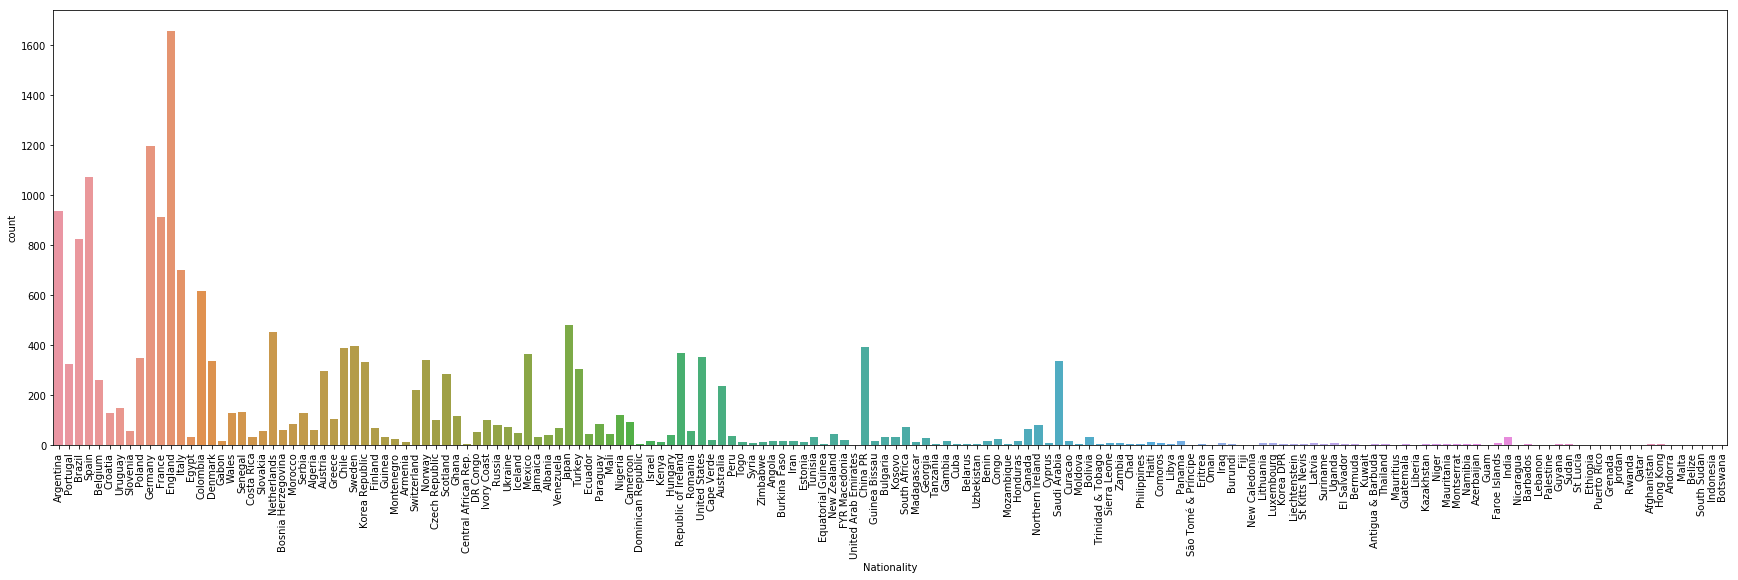

In [18]:
plt.figure(figsize=(30,8))
sns.countplot(data['Nationality'])
plt.xticks(rotation=90)
print(data['Nationality'].value_counts().sort_values(ascending=False).index[:5].values)

Text(0.5, 1.0, 'value<20000')

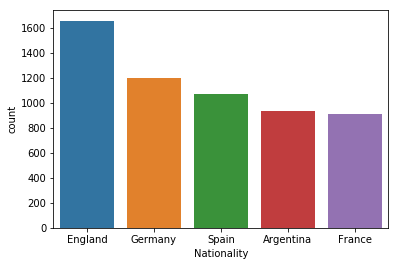

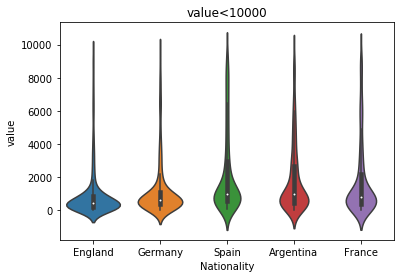

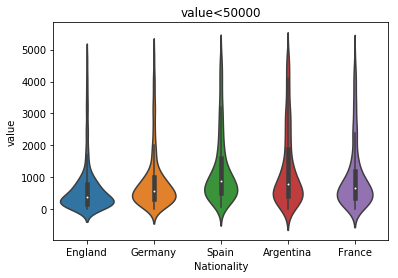

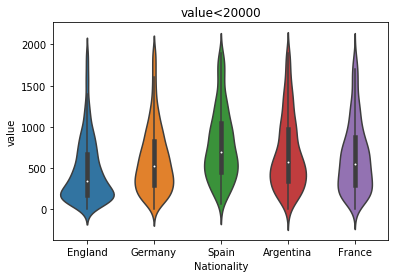

In [19]:
sns.countplot(x='Nationality',order=['England','Germany','Spain','Argentina','France'],data=data)
plt.figure()
sns.violinplot(x='Nationality',y='value',data=data[data['value']<10000],order=['England','Germany','Spain','Argentina','France'])
plt.title('value<10000')
plt.figure()
sns.violinplot(x='Nationality',y='value',data=data[data['value']<5000],order=['England','Germany','Spain','Argentina','France'])
plt.title('value<50000')
plt.figure()
sns.violinplot(x='Nationality',y='value',data=data[data['value']<2000],order=['England','Germany','Spain','Argentina','France'])
plt.title('value<20000')

'England' 'Germany' 'Spain' 'Argentina' 'France' 这几个国家球员最多，选取这五个国家的球员进行分析，发现不同国家的球员，球员价值分布有略微的不同，如England与France相比，在价值都在2000以下时，France价值分布峰度更加平，England的球员价值更集中。

## wage

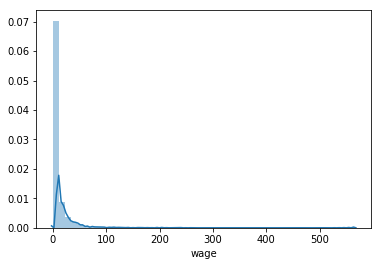

In [20]:
sns.distplot(data['wage'])

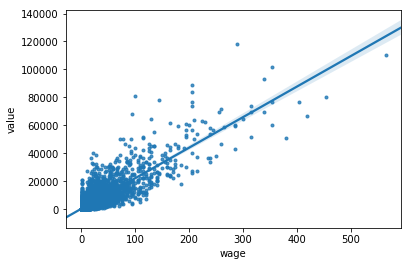

In [21]:
sns.regplot(x='wage',y='value',data=data,marker='.')

整体球员工资的分布特点与价值类似。工资大部分也都集中在一起，个别有工资高的球员，可以看出，价值与工资有明显的相关性，价值越高工资越高，没有价值被埋没的球员。

## Age

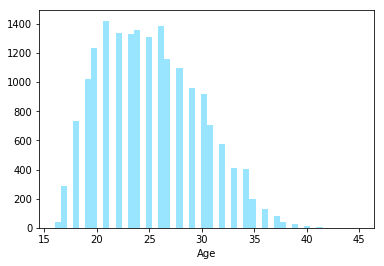

In [22]:
sns.distplot(data['Age'],kde=False,color='deepskyblue')

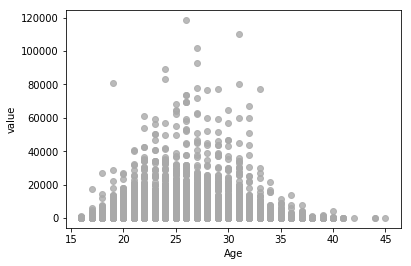

In [23]:
sns.regplot(x='Age',y='value',data=data,fit_reg=False,color='darkgrey')

可以看到，年龄与球员价值是没有线性关系，但有价值的球员年龄集中在20-30之间，因为年龄太小没有实战经验，年龄大体能跟不上。

## Overall

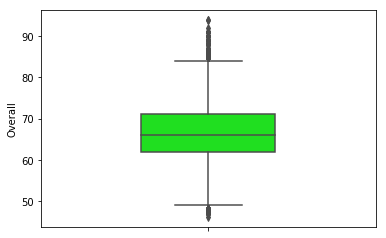

In [24]:
sns.boxplot(y='Overall',data=data,width=0.4,color='lime')

In [25]:
def log(x):
    return np.log10(x)
test=data[['Overall','value']].copy()
test['logvalue'] = test['value'].apply(log)

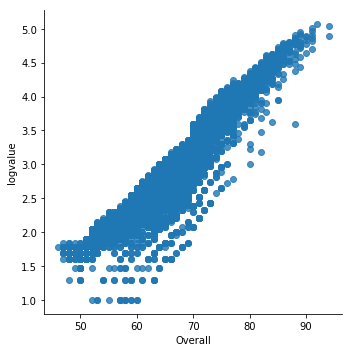

In [26]:
sns.lmplot('Overall','logvalue',data=test)

In [27]:
test.corr()

,Overall,value,logvalue
Overall,1.000000,0.626913,0.938438
value,0.626913,1.000000,0.669360
logvalue,0.938438,0.669360,1.000000


球员的整体表现主要集中在60-70之间。球员的整体表现与球员价值的对数有很强的相关性，所以有很大的影响。

## Potential

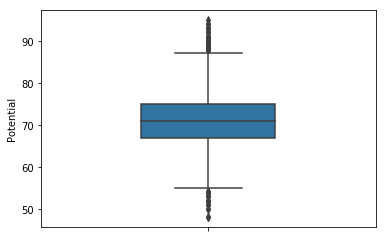

In [28]:
sns.boxplot(y = 'Potential',data=data,width=0.4)

(1, 1000000)

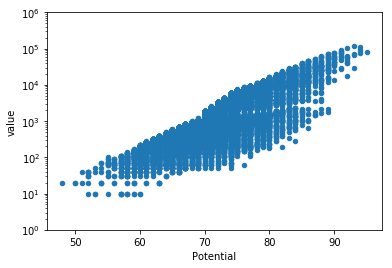

In [29]:
data.plot.scatter('Potential','value',logy=True)
plt.ylim(1,10**6)

与整体表现类似，球员的潜能与价值对数也有强相关。

## 总结

价值主要集中在600左右，高价值的球员占极少一部分。高价值球员可望不可求。

球员的整体表现和潜能对球员价值的对数有很强的相关性，是球员价值的主要影响因素。球员的工资与球员的价值有强相关性。

年龄对球员的价值有一定的非线性关系，高价值球员年龄集中在20-30之间

国家和用脚的习惯对球员的价值影响较小。